In [ ]:
cd /content/drive

/content/drive


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [5]:
X, y = make_moons(n_samples=100000, noise=0.5)
X_train,  X_test,y_train, y_test = train_test_split(X,y)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [7]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=0.5, bootstrap=True )

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.80676

In [9]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train,y_train)

y_pred = tree_clf.predict(X_test)

accuracy_score(y_pred, y_test)

0.74708

In [ ]:
from sklearn.svm import SVC
svc_clf = BaggingClassifier(SVC(),n_estimators=100,max_samples=0.5, bootstrap=True )

svc_clf.fit(X_train,y_train)

y_pred = svc_clf.predict(X_test)

accuracy_score(y_pred, y_test)

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
GB_clf.fit(X_train,y_train)

y_pred = GB_clf.predict(X_test)

accuracy_score(y_pred, y_test)


In [ ]:
def plot_dataset(X,y,show=True) :
  plt.plot(X[:,0][y==0],X[:,1][y==0],'s')
  plt.plot(X[:,0][y==1],X[:,1][y==1],'^')
  plt.plot(X[:,0][y==2],X[:,1][y==2],'o')

  if show:
    plt.show()

In [ ]:
def plot_decision_boundary(clf,axes=None):
  if axes is None :
    X0 = np.linspace(-3,4,100)
    X1 = np.linspace(-3,4,100)

  else :
    X0 = np.linspace(axes[0][0], axes[0][1], 100)
    X1 = np.linspace(axes[1][0], axes[1][1], 100) 

  X0, X1 = np.meshgrid(X0,X1)
  X_new = np.c_[X0.ravel(),X1.ravel()]

  y_pred = clf.predict(X_new).reshape(X0.shape)

  plt.contour(X0,X1,y_pred, alpha=0.25)
  plt.show()

In [ ]:
plt.figure(figsize=(6,4))

plot_dataset(X,y,False)
plot_decision_boundary(tree_clf)

plt.show()

In [ ]:
plt.figure(figsize=(6,4))

plot_dataset(X,y,False)
plot_decision_boundary(bag_clf)

plt.show()

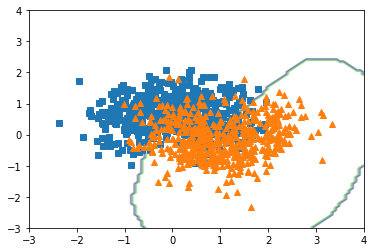

In [ ]:
plt.figure(figsize=(6,4))

plot_dataset(X,y,False)
plot_decision_boundary(svc_clf)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_leaf_nodes=16)


rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.808

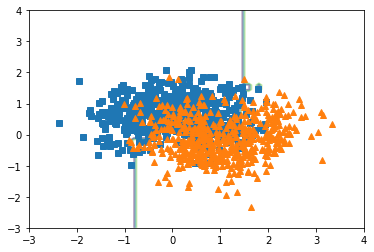

In [ ]:
plt.figure(figsize=(6,4))

plot_dataset(X,y,False)
plot_decision_boundary(rnd_clf)

plt.show()

In [ ]:
rnd_clf.feature_importances_

array([0.45457449, 0.54542551])

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X_iris, y_iris = data['data'], data['target']

rnd_clf = RandomForestClassifier(max_leaf_nodes=16)
rnd_clf.fit(X_iris,y_iris)

for feat,score in zip(data['feature_names'], rnd_clf.feature_importances_) :
  print(feat, '\t', score)

sepal length (cm) 	 0.10475999120334294
sepal width (cm) 	 0.0329091422766738
petal length (cm) 	 0.44006874326233403
petal width (cm) 	 0.42226212325764934


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), learning_rate=0.5)

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

accuracy_score(y_pred,y_test)


0.804

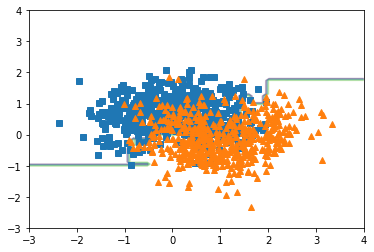

In [ ]:
plt.figure(figsize=(6,4))

plot_dataset(X,y,False)
plot_decision_boundary(ada_clf)
plt.show()